In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
a='./linear regression/Linear_X_Train.csv'
b='./linear regression/Linear_Y_Train.csv'
# c='./linear regression/Linear_X_Test.csv'
d='./linear regression/Linear_X_Test.csv'

In [103]:
x=pd.read_csv(a)
y=pd.read_csv(b)

In [104]:
#normalisation ie sd should be closest to 1

u = x.mean()
sd = x.std()

x=(x-u)/sd;

# x.head()

In [105]:
x=x.values
y=y.values

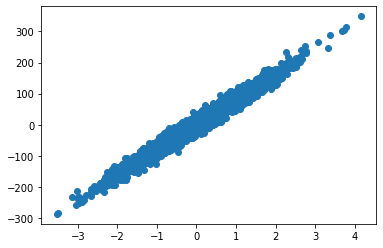

In [106]:
plt.scatter(x,y)

In [191]:
# def hypothesis(x,theta):
#     y_=theta[0]+theta[1]*x
#     return y_

# def gradient(X,Y,theta):#gradient is summation of yi_hat(val on line) - yi(y actual value) so its the sum of error
#     m=len(Y)#No of points. so for that 
#     grad=[0,0]
#     grad=np.array(grad)
#     for i in range(m):
#         y_hat=hypothesis(X[i],theta)# y hat is the value of y at the linear line. so it's calculated using values of m & c and x;
#         y=Y[i]
#         grad[0]+=(y_hat-y)#this one is gradient of theta0 which after partial derivative was this
#         grad[1]+=(y_hat-y)*X[i]#this one is gradient of theta1 which after partial derivative was this
#     return (grad)/m

# def error_fn(X,Y,theta):
#     m=len(Y)
#     print(m)
#     error=0.0
#     for i in range(m):
#         error+=(hypothesis(X[i],theta)-Y[i])**2
#     return error/m

# def gradient_descent(X,Y,learning_curve=0.1):
#     gd=[0,0]
#     gd=np.array(gd)
#     e_list=[]
#     for i in range(100):
#         grad=gradient(X,Y,gd)
#         e_list.append(error_fn(X,Y,grad))
#         gd[0]=gd[0]-learning_curve*(grad[0])
#         gd[1]=gd[1]-learning_curve*(grad[1])
#     return gd,e_list

def hypothesis(x,theta):
    # theta=[theta0,theta1]
    y_ = theta[0]+theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        y = Y[i]
        
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*X[i]
        
    return grad/m

def error(X,Y,theta):
    m = x.shape[0]
    totalerr=0.0
    for i in range (m):
        y_=hypothesis(X[i],theta)
        totalerr+=(y_ - Y[i])**2
        
    return totalerr/m

def gradientDescent(X,Y,maxsteps=100,learning_rate=0.1):
    
    theta = np.zeros((2,))
    errorlist=[]
    for i in range (maxsteps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        errorlist.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,errorlist

In [192]:
theta,error_list = gradientDescent(x,y)

In [193]:
theta

array([ 0.6838508 , 79.91426418])

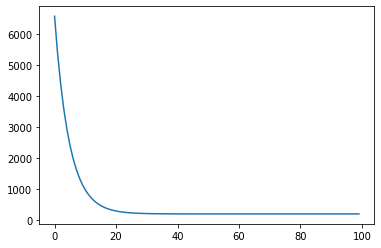

In [194]:
plt.plot(error_list)

        ## PLOT THE Y_ line 

In [195]:
y_=hypothesis(x,theta)

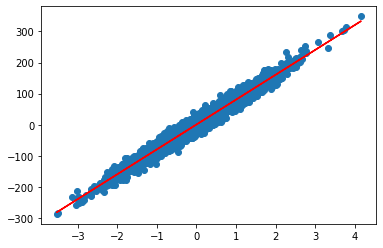

In [196]:
plt.scatter(x,y)
plt.plot(x,y_,color="red")

In [197]:
test_data=pd.read_csv(d)

In [198]:
td=test_data.values

In [199]:
t=hypothesis(td,theta)

In [200]:
t

array([[-149.39069522],
       [ -68.76419531],
       [-201.51381591],
       ...,
       [  10.91350164],
       [ -21.5353186 ],
       [ -53.69184664]])

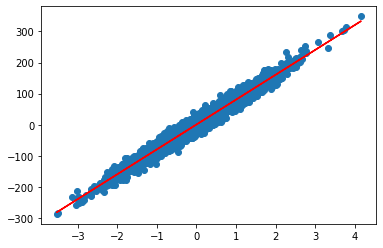

In [201]:
plt.scatter(x,y)
plt.plot(x,y_,color="red")
# plt.plot(x,t,color="orange")

In [202]:
t_d=pd.DataFrame(t,columns=["y"])

In [203]:
t_d.to_csv('y_pred.csv',index=False)

In [204]:
def score(y,y_):
    num=sum(y-y_)**2
    den=sum(y-(y/len(y)))**2
    
    return (1-(num/den))*100

In [205]:
score(y,y_)

array([99.99999993])